In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('https://raw.githubusercontent.com/pydeveloperashish/Diabetes-Prediction-using-ML-AND-DL/main/diabetes.csv')

In [16]:
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
#checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
df.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [39]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0    500
1    268
Name: Outcome, dtype: int64


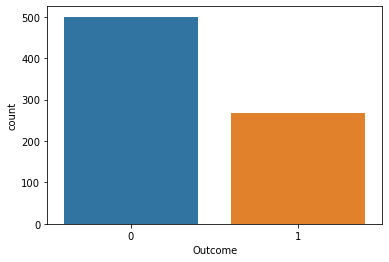

In [38]:
print(df['Outcome'].value_counts())
sns.countplot('Outcome',data=df)

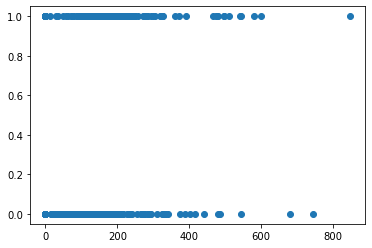

In [64]:
plt.scatter(x=df['Insulin'],y=df['Outcome'])

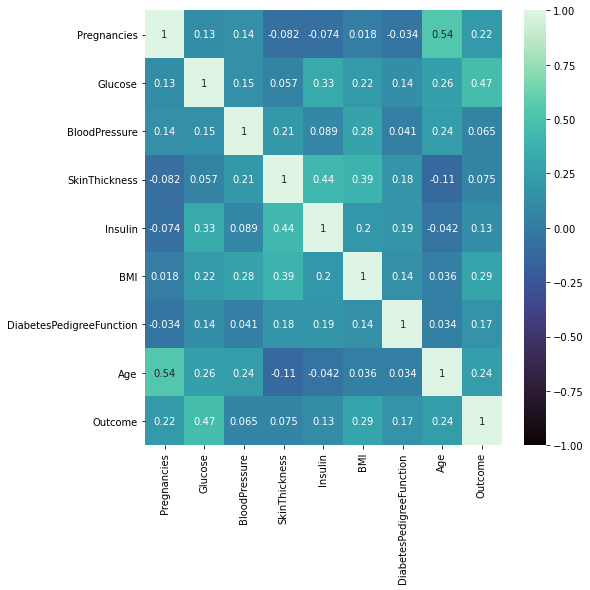

In [46]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,center=0,cmap='mako')

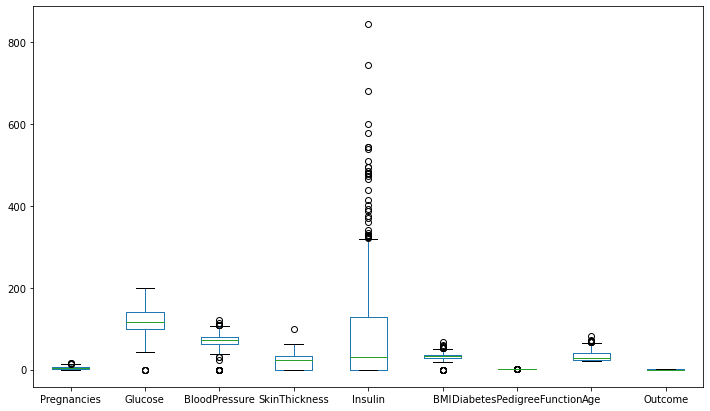

In [58]:
df.boxplot(grid=False,figsize=(12,7))

plt.show()

In [66]:
#separating features and labels
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [68]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [76]:
print("x_train {} x_test {}" .format(x_train.shape,x_test.shape))

x_train (576, 8) x_test (192, 8)


In [77]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
223,7,142,60,33,190,28.8,0.687,61
63,2,141,58,34,128,25.4,0.699,24
690,8,107,80,0,0,24.6,0.856,34
122,2,107,74,30,100,33.6,0.404,23
331,2,87,58,16,52,32.7,0.166,25


In [82]:
# standardscaler
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [83]:
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

In [84]:
x_train

array([[ 0.88578677,  0.68447379, -0.47665416, ..., -0.45929902,
         0.63378147,  2.40426552],
       [-0.56533149,  0.65307391, -0.58000549, ..., -0.90311962,
         0.66977793, -0.80604128],
       [ 1.17601042, -0.41452204,  0.5568591 , ..., -1.00754799,
         1.14073166,  0.06160921],
       ...,
       [-0.56533149, -0.32032239,  0.24680512, ...,  0.01062867,
         0.66677823, -0.54574613],
       [ 2.33690502, -0.6343212 ,  0.76356175, ..., -0.30265646,
         0.03684013,  1.10278979],
       [ 0.01511582,  0.74727355,  0.66021043, ...,  0.80689503,
         0.23482068,  0.32190436]])

# LogisticRegression

In [87]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [88]:
y_pred=model.predict(x_test)

In [96]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_test,y_pred)

array([[112,  15],
       [ 27,  38]])

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       127
           1       0.72      0.58      0.64        65

    accuracy                           0.78       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.78      0.78      0.78       192



In [98]:
accuracy_score(y_test,y_pred)

0.78125

# DecisionTree

In [101]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()

In [102]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [103]:
y_pre=model_dt.predict(x_test)

In [104]:
y_pre

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [105]:
accuracy_score(y_test,y_pre)

0.6979166666666666